In [1]:
import tensorflow as tf

## 合并和分割

### 合并
合并是指将多个张量在某个维度上合并为一个张量。  
张量的合并可以使用拼接(Concatenate)和堆叠(Stack)操作实现，拼接操作并不会产生新的维度，仅在现有的维度上合并，而堆叠会创建新维度。选择使用拼接还是堆叠操作来合并张量，取决于具体的场景是否需要创建新维度。

#### 拼接
在 TensorFlow 中，可以通过 tf.concat(tensors, axis)函数拼接张量，其中参数tensors 保存了所有需要合并的张量 List，axis 参数指定需要合并的维度索引。

In [2]:
a = tf.random.normal([4,35,8]) 
b = tf.random.normal([6,35,8])
tf.concat([a,b],axis=0).shape

TensorShape([10, 35, 8])

In [3]:
a = tf.random.normal([10,35,4])
b = tf.random.normal([10,35,4])
tf.concat([a,b],axis=2).shape #在第三个维度上合并

TensorShape([10, 35, 8])

拼接合并操作可以在任意的维度上进行，唯一的约束是非合并维度的长度必须一致。

In [ ]:
a = tf.random.normal([4,32,8])
b = tf.random.normal([6,35,8])
tf.concat([a,b],axis=0) # error

#### 堆叠
如果在合并数据时，希望创建一个新的维度，则需要使用 tf.stack 操作。
使用 tf.stack(tensors, axis)可以堆叠方式合并多个张量，通过 tensors 列表表示，参数axis 指定新维度插入的位置，axis 的用法与 tf.expand_dims 的一致，当axis ≥ 0时，在 axis之前插入；当axis < 0时，在 axis 之后插入新维度。

In [4]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
tf.stack([a,b],axis=0).shape

TensorShape([2, 35, 8])

In [5]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
tf.stack([a,b],axis=-1).shape

TensorShape([35, 8, 2])

tf.stack 也需要满足张量堆叠合并条件，它需要所有待合并的张量 shape 完全一致才可合并。

In [ ]:
a = tf.random.normal([35,4])
b = tf.random.normal([35,8])
tf.stack([a,b],axis=-1) #error

### 分割
合并操作的逆过程就是分割，将一个张量分拆为多个张量。  
通过 tf.split(x, num_or_size_splits, axis)可以完成张量的分割操作，参数意义如下：  
❑ x 参数：待分割张量。  
❑ num_or_size_splits 参数：切割方案。当 num_or_size_splits 为单个数值时，如 10，表示等长切割为 10 份；  
$ ~ ~ ~ ~ $当 num_or_size_splits 为 List 时，List 的每个元素表示每份的长度，如[2,4,2,2]表示切割为 4 份，每份的长度依次是 2、4、2、2。  
❑ axis 参数：指定分割的维度索引号。


In [6]:
x = tf.random.normal([10,35,8])
result = tf.split(x, num_or_size_splits=10, axis=0)
type(result),len(result),result[0].shape

(list, 10, TensorShape([1, 35, 8]))

In [7]:
x = tf.random.normal([10,35,8])
result = tf.split(x, num_or_size_splits=[4,2,2,2] ,axis=0)
type(result),len(result),result[0].shape,result[1].shape,result[2].shape,result[3].shape

(list,
 4,
 TensorShape([4, 35, 8]),
 TensorShape([2, 35, 8]),
 TensorShape([2, 35, 8]),
 TensorShape([2, 35, 8]))

特别地，如果希望在某个维度上全部按长度为 1 的方式分割，还可以使用 tf.unstack(x,axis)函数。这种方式是 tf.split 的一种特殊情况，切割长度固定为 1，只需要指定切割维度的索引号即可。

In [8]:
x = tf.random.normal([10,35,8])
result = tf.unstack(x,axis=0)
type(result),len(result),result[0].shape

(list, 10, TensorShape([35, 8]))

### 数据统计
在神经网络的计算过程中，经常需要统计数据的各种属性，如最值、最值位置、均值、范数等信息。由于张量通常较大，直接观察数据很难获得有用信息，通过获取这些张量的统计信息可以较轻松地推测张量数值的分布。

####  向量范数
向量范数(Vector Norm)是表征向量“长度”的一种度量方法，它可以推广到张量上。  
在神经网络中，常用来表示张量的权值大小，梯度大小等。常用的向量范数有：  
❑ L1 范数，定义为向量𝒙的所有元素绝对值之和  
$ ~ ~ ~ ~ ~ ~ ~ ~ ‖𝒙‖_1 = \underset{i}{\sum}|𝑥_𝑖|$  
❑ L2 范数，定义为向量𝒙的所有元素的平方和，再开根号  
$~ ~ ~ ~ ~ ~ ~ ~ ‖𝒙‖_2 = \sqrt{\underset{i}{\sum}|𝑥_𝑖|^2}$  
❑ ∞ −范数，定义为向量𝒙的所有元素绝对值的最大值：  
$~ ~ ~ ~ ~ ~ ~ ~ ‖𝒙‖_∞ = 𝑚𝑎𝑥(|𝑥_𝑖|)$  
  
在 TensorFlow 中，可以通过 tf.norm(x, ord)求解张量的 L1、L2、∞等范数，其中参数
ord 指定为 1、2 时计算 L1、L2 范数，指定为 np.inf 时计算∞ −范数.

In [9]:
import numpy as np
x = tf.ones([2,2])
tf.norm(x,ord=1),tf.norm(x,ord=2),tf.norm(x,ord=np.inf)

(<tf.Tensor: shape=(), dtype=float32, numpy=4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

#### 最值、均值、和
通过 tf.reduce_max、tf.reduce_min、tf.reduce_mean、tf.reduce_sum 函数可以求解张量在某个维度上的最大、最小、均值、和，也可以求全局最大、最小、均值、和信息。 

In [10]:
x = tf.random.normal([4,10]) 
tf.reduce_max(x,axis=1) 

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.6667218, 1.5957055, 1.7136148, 2.0847924], dtype=float32)>

In [11]:
tf.reduce_min(x,axis=1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.3424911, -2.7624686, -3.117391 , -1.7332194], dtype=float32)>

In [12]:
 tf.reduce_mean(x,axis=1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.23468718, -0.17277518, -0.09554444,  0.207407  ], dtype=float32)>

当不指定 axis 参数时，tf.reduce_ * 函数会求解出全局元素的最大、最小、均值、和等数据

In [13]:
x = tf.random.normal([4,10])
tf.reduce_max(x),tf.reduce_min(x),tf.reduce_mean(x)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.362527>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-2.6612773>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.08071161>)

In [14]:
out = tf.random.normal([4,10])
y = tf.constant([1,2,2,0])
y = tf.one_hot(y,depth=10)
loss = tf.keras.losses.mse(y,out)
loss = tf.reduce_mean(loss)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.1941783>

In [15]:
out = tf.random.normal([4,10])
tf.reduce_sum(out,axis=-1)# 求最后一个维度的和

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 5.5962934, -4.9783134, -4.3652864, -1.5307162], dtype=float32)>

In [16]:
out = tf.random.normal([2,10])
out = tf.nn.softmax(out, axis=1)
out

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.00977206, 0.14287387, 0.15072855, 0.21675526, 0.12673135,
        0.09582576, 0.04481831, 0.152985  , 0.01998711, 0.03952277],
       [0.03949009, 0.0670123 , 0.10296018, 0.26030487, 0.2343173 ,
        0.04061415, 0.03966101, 0.02329994, 0.1806511 , 0.01168898]],
      dtype=float32)>

通过 tf.argmax(x, axis)和 tf.argmin(x, axis)可以求解在 axis 轴上，x 的最大值、最小值所在的索引号

In [17]:
pred = tf.argmax(out, axis=1) # 选取概率最大的位置
pred

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 3], dtype=int64)>

## 张量比较

In [18]:
out = tf.random.normal([100,10])
out = tf.nn.softmax(out, axis=1)
pred = tf.argmax(out, axis=1)
pred

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([8, 8, 1, 0, 3, 7, 3, 4, 6, 9, 7, 5, 9, 0, 3, 3, 9, 0, 3, 3, 2, 9,
       6, 8, 7, 5, 1, 9, 1, 3, 8, 2, 8, 8, 9, 5, 9, 8, 5, 7, 9, 6, 0, 5,
       7, 6, 9, 7, 9, 8, 7, 3, 9, 8, 5, 3, 6, 6, 7, 4, 2, 2, 0, 9, 6, 4,
       1, 5, 0, 2, 4, 2, 8, 5, 6, 5, 0, 1, 5, 5, 4, 0, 6, 2, 8, 9, 7, 8,
       6, 4, 4, 1, 1, 5, 8, 2, 6, 9, 1, 4], dtype=int64)>

tf.equal()函数返回布尔类型的张量比较结果，只需要统计张量中 True 元素的个数，即可知道预测正确的个数。

In [19]:
y = tf.random.uniform([100],dtype=tf.int64,maxval=10)
out = tf.equal(pred,y)
out 

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])>

In [20]:
out = tf.cast(out, dtype=tf.float32) # 布尔型转 int 型,True 对应为 1，False 对应为 0
correct = tf.reduce_sum(out) # 统计 True 的个数
correct

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

除了比较相等的 tf.equal(a, b)函数，其它的比较函数用法类似.  
  
|常用比较函数|比较逻辑|
|---|---|
|tf.math.greater| 𝑎 > 𝑏|
|tf.math.less |𝑎 < 𝑏|
|tf.math.greater_equal |𝑎 ≥ 𝑏|
|tf.math.less_equal |𝑎 ≤ 𝑏|
|tf.math.not_equal |𝑎 ≠ 𝑏|
|tf.math.is_nan |𝑎 = nan|


## 填充复制

### 填充
对于图片数据的高和宽、序列信号的长度，维度长度可能各不相同。为了方便网络的并行计算，需要将不同长度的数据扩张为相同长度，之前我们介绍了通过复制的方式可以增加数据的长度，但是重复复制数据会破坏原有的数据结构，并不适合于此处。通常的做法是，在需要补充长度的数据开始或结束处填充足够数量的特定数值，这些特定数值一般代表了无效意义，例如 0，使得填充后的长度满足系统要求。那么这种操作就叫作填充(Padding)

填充操作可以通过 tf.pad(x, paddings)函数实现，参数 paddings 是包含了多个[Left Padding,Right Padding]的嵌套方案 List，如[[0,0],[2,1],[1,2]]表示第一个维度不填充，第二个维度左边(起始处)填充两个单元，右边(结束处)填充一个单元，第三个维度左边填充一个单元

In [21]:
a = tf.constant([1,2,3,4,5,6]) # 第一个句子
b = tf.constant([7,8,1,6]) # 第二个句子
b = tf.pad(b, [[0,2]]) # 句子末尾填充 2 个 0
b

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([7, 8, 1, 6, 0, 0])>

In [22]:
tf.stack([a,b],axis=0)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 5, 6],
       [7, 8, 1, 6, 0, 0]])>

在自然语言处理中，需要加载不同句子长度的数据集，有些句子长度较小，如仅 10 个单词，部份句子长度较长，如超过 100 个单词。为了能够保存在同一张量中，一般会选取能够覆盖大部分句子长度的阈值，如 80 个单词。对于小于 80 个单词的句子，在末尾填充相应数量的 0；对大于 80 个单词的句子，截断超过规定长度的部分单词。以 IMDB 数据集的加载为例，我们来演示如何将不等长的句子变换为等长结构:

In [24]:
total_words = 10000 # 设定词汇量大小
max_review_len = 80 # 最大句子长度
embedding_len = 100 # 词向量长度
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)
# 将句子填充或截断到相同长度，设置为末尾填充和末尾截断方式
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len,truncating='post',padding='post')
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len,truncating='post',padding='post')
print(x_train.shape, x_test.shape)

(25000, 80) (25000, 80)


In [25]:
x = tf.random.normal([4,28,28,1])
tf.pad(x,[[0,0],[2,2],[2,2],[0,0]]).shape

TensorShape([4, 32, 32, 1])

### 复制
通过 tf.tile()函数实现长度为 1 的维度复制的功能。tf.tile 函数除了可以对长度为 1 的维度进行复制若干份，还可以对任意长度的维度进行复制若干份，进行复制时会根据原来的数据次序重复复制.

In [26]:
x = tf.random.normal([4,32,32,3])
tf.tile(x,[2,3,3,1]).shape #[4,32,32,3]- >[4,32,96,3]- >[4,96,96,3]- >[8,96,96,3]

TensorShape([8, 96, 96, 3])

## 数据限幅
考虑怎么实现非线性激活函数 ReLU 的问题。它其实可以通过简单的数据限幅运算实现，限制元素的范围𝑥 ∈ [0, +∞)即可。  
在 TensorFlow 中，可以通过 tf.maximum(x, a)实现数据的下限幅，即𝑥 ∈ [𝑎, +∞)；  
$~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ ~ ~~~ ~ ~ ~ ~~ ~ ~ ~ ~ ~$可以通过 tf.minimum(x, a)实现数据的上限幅，即𝑥 ∈ (−∞,𝑎].

In [27]:
x = tf.range(9)
tf.maximum(x,2)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8])>

In [28]:
tf.minimum(x,7)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 7])>

通过组合 tf.maximum(x, a)和 tf.minimum(x, b)可以实现同时对数据的上下边界限幅，即𝑥 ∈ [𝑎, 𝑏]

In [29]:
tf.minimum(tf.maximum(x,2),7) 

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

更方便地，我们可以使用 tf.clip_by_value 函数实现上下限幅

In [30]:
x = tf.range(9)
tf.clip_by_value(x,2,7)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

## 高级操作

## tf.gather
tf.gather 可以实现根据索引号收集数据的目的

In [31]:
x = tf.random.uniform([4,35,8],maxval=100,dtype=tf.int32)
tf.gather(x,[0,1],axis=0).shape #收集第一个维度上的0~1的数据

TensorShape([2, 35, 8])

In [32]:
tf.gather(x,[0,3,8,11,12,26],axis=1).shape

TensorShape([4, 6, 8])

In [33]:
tf.gather(x,[2,4],axis=2).shape

TensorShape([4, 35, 2])

In [34]:
a=tf.reshape(tf.range(8),[4,2]) 
tf.gather(a,[3,1,0,2],axis=0)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[6, 7],
       [2, 3],
       [0, 1],
       [4, 5]])>

In [35]:
tf.gather(tf.gather(x,[1,2],axis=0),[2,3,5,26],axis=1).shape

TensorShape([2, 4, 8])

## tf.gather_nd
通过 tf.gather_nd 函数，可以通过指定每次采样点的多维坐标来实现采样多个点的目的

In [36]:
tf.stack([x[1,1],x[2,2],x[3,3]],axis=0)

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[71, 84,  1, 89, 20, 49,  1, 55],
       [34, 37,  0, 87, 94, 60, 35, 60],
       [80, 63, 77, 63, 37, 60, 66, 59]])>

In [37]:
tf.gather_nd(x,[[1,1],[2,2],[3,3]])

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[71, 84,  1, 89, 20, 49,  1, 55],
       [34, 37,  0, 87, 94, 60, 35, 60],
       [80, 63, 77, 63, 37, 60, 66, 59]])>

In [38]:
tf.gather_nd(x,[[1,1,2],[2,2,3],[3,3,4]])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 1, 87, 37])>

###  tf.boolean_mask
除了可以通过给定索引号的方式采样，还可以通过给定掩码(Mask)的方式进行采样。继续以 shape 为[4,35,8]的张量为例，这次我们以掩码方式进行数据提取。

In [39]:
tf.boolean_mask(x,mask=[True, False,False,True],axis=0).shape

TensorShape([2, 35, 8])

In [40]:
tf.boolean_mask(x,mask=[True,False,False,True,True,False,False,True],axis=2).shape

TensorShape([4, 35, 4])

In [41]:
x = tf.random.uniform([2,3,8],maxval=100,dtype=tf.int32)
tf.gather_nd(x,[[0,0],[0,1],[1,1],[1,2]])

<tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[13, 61, 52, 26,  6, 17,  0, 37],
       [83, 92, 81, 42, 74, 33, 37, 83],
       [75, 12, 11, 17,  3, 45, 91, 12],
       [68,  8,  4, 72, 11, 24, 55, 70]])>

In [42]:
tf.boolean_mask(x,[[True,True,False],[False,True,True]])

<tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[13, 61, 52, 26,  6, 17,  0, 37],
       [83, 92, 81, 42, 74, 33, 37, 83],
       [75, 12, 11, 17,  3, 45, 91, 12],
       [68,  8,  4, 72, 11, 24, 55, 70]])>

###  tf.where
通过 tf.where(cond, a, b)操作可以根据 cond 条件的真假从参数𝑨或𝑩中读取数据，条件判定规则如下：
$o_i=\begin{cases}a_i  &cond _𝑖为 True\\\ b_i &cond _𝑖为False\end{cases}$  
其中𝑖为张量的元素索引，返回的张量大小与𝑨和𝑩一致，当对应位置的$cond_𝑖$为 $True$，$𝑜_𝑖$从$𝑎_𝑖$中复制数据；当对应位置的$cond_𝑖$为 $False$，$𝑜_𝑖$从$𝑏_𝑖$中复制数据。

In [43]:
a = tf.ones([3,3])
b = tf.zeros([3,3]) 
cond = tf.constant([[True,False,False],[False,True,False],[True,True,False]])
tf.where(cond,a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

当参数 a=b=None 时，即 a 和 b 参数不指定，tf.where 会返回 cond 张量中所有 True 的元素的索引坐标.

In [44]:
tf.where(cond) 

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [1, 1],
       [2, 0],
       [2, 1]], dtype=int64)>

In [45]:
x = tf.random.normal([3,3])
mask=x>0
print(mask)
indices=tf.where(mask)
indices

tf.Tensor(
[[False  True False]
 [ True  True False]
 [ True False  True]], shape=(3, 3), dtype=bool)


<tf.Tensor: shape=(5, 2), dtype=int64, numpy=
array([[0, 1],
       [1, 0],
       [1, 1],
       [2, 0],
       [2, 2]], dtype=int64)>

In [46]:
tf.gather_nd(x,indices) 

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.03511791, 0.05371907, 0.75768787, 0.15414286, 0.14002506],
      dtype=float32)>

In [47]:
tf.boolean_mask(x,mask)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.03511791, 0.05371907, 0.75768787, 0.15414286, 0.14002506],
      dtype=float32)>

### scatter_nd
通过 tf.scatter_nd(indices, updates, shape)函数可以高效地刷新张量的部分数据，但是这个函数只能在全 0 的白板张量上面执行刷新操作，因此可能需要结合其它操作来实现现有张量的数据刷新功能。

In [48]:
indices = tf.constant([[4], [3], [1], [7]])
# 构造需要写入的数据，4 号位写入 4.4,3 号位写入 3.3，以此类推
updates = tf.constant([4.4, 3.3, 1.1, 7.7]) 
# 在长度为 8 的全 0 向量上根据 indices 写入 updates 数据
tf.scatter_nd(indices, updates, [8])

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0. , 1.1, 0. , 3.3, 4.4, 0. , 0. , 7.7], dtype=float32)>

In [49]:
indices = tf.constant([[1],[3]])
updates = tf.constant([# 构造写入数据，即 2 个矩阵
 [[5,5,5,5],[6,6,6,6],[7,7,7,7],[8,8,8,8]],
 [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
])
# 在 shape 为[4,4,4]白板上根据 indices 写入 updates
tf.scatter_nd(indices,updates,[4,4,4])

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]]])>

### tf.meshgrid
通过 tf.meshgrid 函数可以方便地生成二维网格的采样点坐标，方便可视化等应用场合.

(100, 100) (100, 100)


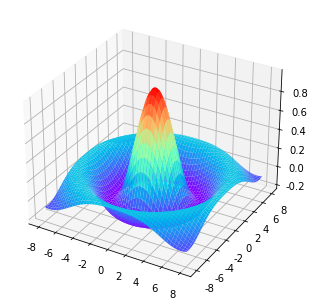

In [50]:
x = tf.linspace(-8.,8,100) 
y = tf.linspace(-8.,8,100)
x,y = tf.meshgrid(x,y)
print(x.shape,y.shape) 
z = tf.sqrt(x**2+y**2) 
z = tf.sin(z)/z
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.unicode_minus']=False
pl = plt.figure()
ax=Axes3D(pl,auto_add_to_figure=False)
pl.add_axes(ax)
ax.plot_surface(x.numpy(), y.numpy(), z.numpy(),cmap=plt.get_cmap('rainbow'))
plt.show()

## 经典数据集加载
在 TensorFlow 中，keras.datasets 模块提供了常用经典数据集的自动下载、管理、加载与转换功能，并且提供了 tf.data.Dataset 数据集对象，方便实现多线程(Multi-threading)、预处理(Preprocessing)、随机打散(Shuffle)和批训练(Training on Batch)等常用数据集的功能。

通过 datasets.xxx.load_data()函数即可实现经典数据集的自动加载，其中 xxx 代表具体的数据集名称，如“CIFAR10”、“MNIST”。TensorFlow 会默认将数据缓存在用户目录下的.keras/datasets 文件夹.

In [51]:
import tensorflow as tf
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x.shape, y.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

数据加载进入内存后，需要转换成 Dataset 对象，才能利用 TensorFlow 提供的各种便捷功能。通过 Dataset.from_tensor_slices 可以将训练部分的数据图片 x 和标签 y 都转换成Dataset 对象

In [52]:
train_db = tf.data.Dataset.from_tensor_slices((x, y)) #返回数据集对象

通过 Dataset.shuffle(buffer_size)工具可以设置 Dataset 对象随机打散数据之间的顺序，防止每次训练时数据按固定顺序产生，从而使得模型尝试“记忆”住标签信息.

In [53]:
train_db = train_db.shuffle(10000)  #buffer_size 参数指定缓冲池的大小，一般设置为一个较大的常数即可。

为了利用显卡的并行计算能力，一般在网络的计算过程中会同时计算多个样本，我们把这种训练方式叫做批训练，其中一个批中样本的数量叫做 Batch Size。为了一次能够从Dataset 中产生 Batch Size 数量的样本，需要设置 Dataset 为批训练方式.

In [54]:
train_db = train_db.batch(128) #其中 128 为 Batch Size 参数，即一次并行计算 128 个样本的数据

从 keras.datasets 中加载的数据集的格式大部分情况都不能直接满足模型的输入要求，因此需要根据用户的逻辑自行实现预处理步骤。Dataset 对象通过提供 map(func)工具函数，可以非常方便地调用用户自定义的预处理逻辑，它实现在 func 函数里。

In [55]:
def preprocess(x, y): # 自定义的预处理函数
 x = tf.reshape(2*tf.cast(x, dtype=tf.float32) / 255.-1, [-1, 28*28]) 
 y = tf.one_hot(tf.cast(y, dtype=tf.int32) , depth=10)
 return x,y

In [56]:
train_db = train_db.map(preprocess)

对于 Dataset 对象，在使用时可以通过  
for step, (x,y) in enumerate(train_db): # 迭代数据集对象，带 step 参数  
或  
for x,y in train_db: # 迭代数据集对象  
方式进行迭代，每次返回的 x 和 y 对象即为批量样本和标签。当对 train_db 的所有样本完成一次迭代后，for 循环终止退出。这样完成一个 Batch 的数据训练，叫做一个 Step；通过多个 step 来完成整个训练集的一次迭代，叫做一个 Epoch。在实际训练时，通常需要对数据集迭代多个 Epoch 才能取得较好地训练效果。实现如下：  
for epoch in range(20): # 训练 Epoch 数  
 for step, (x,y) in enumerate(train_db): # 迭代 Step 数  
此外，也可以通过设置 Dataset 对象，使得数据集对象内部遍历多次才会退出，实现如下:  
train_db = train_db.repeat(20) # 数据集迭代 20 遍才终止.  
上述代码使得 for x,y in train_db 循环迭代 20 个 epoch 才会退出。不管使用上述哪种方式，都能取得一样的效果。